# Stock Price Prediction Using Linear Regression

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("TSLA.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [3]:
series_shifted = df['Close'].shift()
df['Adj_close']=series_shifted
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Adj_close
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,NaN
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,23.889999
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,23.830000
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,21.959999
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900,19.200001


In [4]:
df ['Date']=pd.to_datetime(df.Date)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Adj_close
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,NaN
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,23.889999
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,23.830000
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,21.959999
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900,19.200001


In [5]:
df.shape

(2416, 8)

In [6]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Adj_close    1
dtype: int64

In [7]:
df.dropna(inplace=True)
df

,Date,Open,High,Low,Close,Adj Close,Volume,Adj_close
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,23.889999
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,23.830000
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,21.959999
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,19.200001
5,2010-07-07,16.400000,16.629999,14.980000,15.800000,15.800000,6921700,16.110001
...,...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500,558.020020
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500,566.900024
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700,580.989990
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300,640.809998


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2415 entries, 1 to 2415
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2415 non-null   datetime64[ns]
 1   Open       2415 non-null   float64       
 2   High       2415 non-null   float64       
 3   Low        2415 non-null   float64       
 4   Close      2415 non-null   float64       
 5   Adj Close  2415 non-null   float64       
 6   Volume     2415 non-null   int64         
 7   Adj_close  2415 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 169.8 KB


In [9]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume,Adj_close
count,2415,2415.000000,2415.000000,2415.000000,2415.000000,2415.000000,2.415000e+03,2415.000000
mean,2015-04-16 04:34:17.142857216,186.340410,189.646373,182.985118,186.470944,186.470944,5.567259e+06,186.157855
min,2010-06-30 00:00:00,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05,15.800000
25%,2012-11-20 12:00:00,34.375000,34.930001,33.650000,34.400002,34.400002,1.897250e+06,34.400002
50%,2015-04-17 00:00:00,213.100006,216.750000,208.919998,212.960007,212.960007,4.577200e+06,212.960007
75%,2017-09-07 12:00:00,266.450012,270.935012,262.104995,266.779999,266.779999,7.360250e+06,266.724991
max,2020-02-03 00:00:00,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07,650.570007
std,NaN,118.715928,120.870941,116.833297,119.114759,119.114759,4.981607e+06,118.546390


<Axes: >

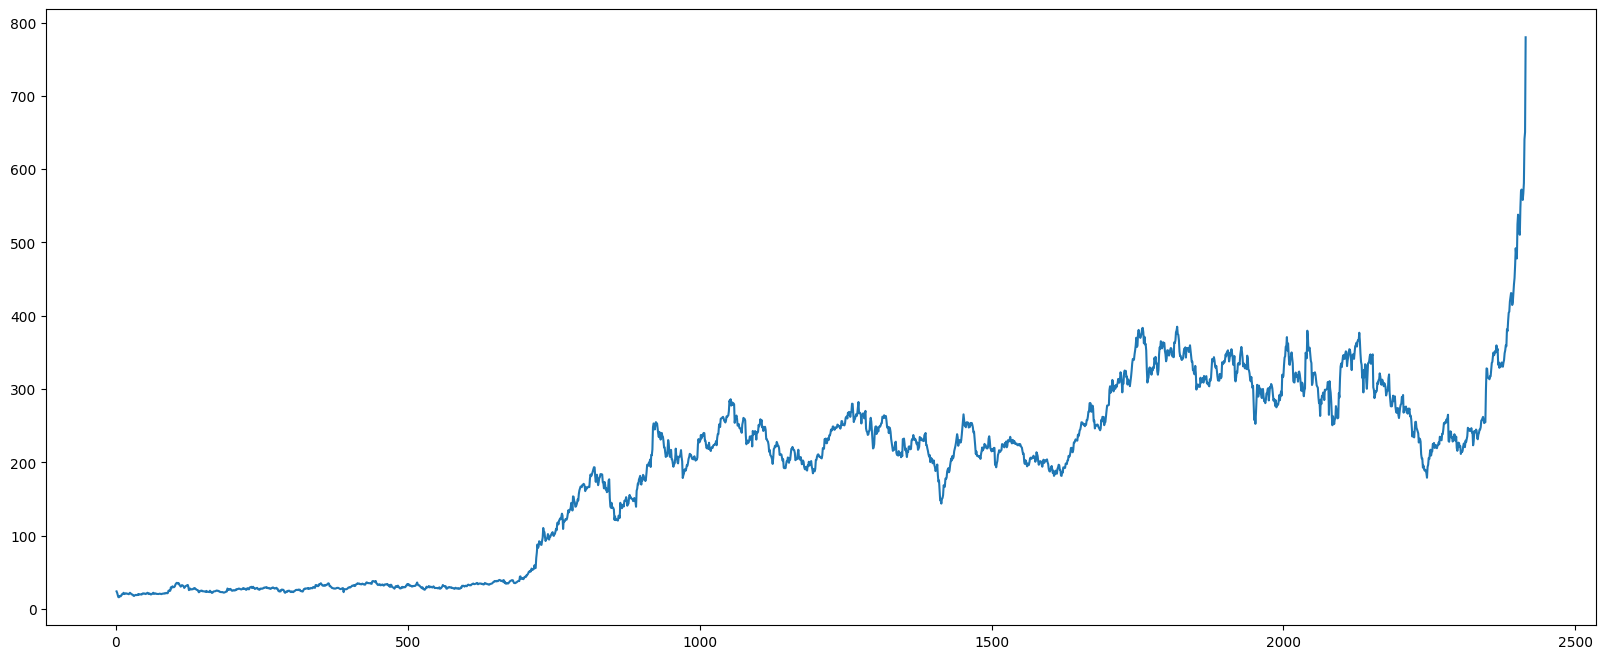

In [10]:
df['Close'].plot(figsize=(20,8))

In [11]:
x=df[['Open','Adj_close','High','Low']]
y=df['Close']

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,random_state=0)

In [13]:
print(x_train.shape, x_test.shape)

(1811, 4) (604, 4)


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor= LinearRegression()
regressor.fit (x_train,y_train)

LinearRegression()

In [15]:
print(regressor.coef_)
print(regressor.intercept_)

[-0.61929248 -0.05818232  0.89992009  0.77664357]
-0.0885783346070923


In [16]:
predicted= regressor.predict (x_test)
print(x_test)
print(predicted)

            Open   Adj_close        High         Low
1874  300.100006  303.700012  313.390015  300.000000
558    28.570000   28.280001   29.500000   28.480000
149    24.049999   24.010000   24.120001   23.500000
1138  210.059998  210.089996  214.199997  204.210007
1662  251.910004  251.550003  252.179993  249.679993
...          ...         ...         ...         ...
2336  241.320007  240.050003  247.300003  240.649994
1453  266.450012  265.420013  269.339996  254.509995
1876  314.600006  311.239990  316.980011  311.260010
1262  278.880005  280.019989  281.690002  276.299988
360    32.500000   31.750000   32.930000   32.220001

[604 rows x 4 columns]
[311.41081358  29.23929085  23.57767789 208.96058968 250.12388976
 204.465434    27.31615324  27.21485194 208.42841653 357.01340355
 247.13248913 280.29248063  30.92133635 101.56891191  20.6157126
 349.90096139 107.54467287 217.94159648  28.328199   226.09851383
 363.71562981 196.94219881 255.76477405 339.22809183 234.71380116
 224.202521

In [17]:
predicted.shape

(604,)

In [18]:
_df=pd.DataFrame({"Actual":y_test,"Predicted":predicted})
_df.head(10)


,Actual,Predicted
1874,313.260010,311.410814
558,29.480000,29.239291
149,24.100000,23.577678
1138,211.279999,208.960590
1662,251.330002,250.123890
1167,204.460007,204.465434
216,27.120001,27.316153
391,26.600000,27.214852
984,210.240005,208.428417
1822,351.089996,357.013404


In [19]:
regressor.score(x_test,y_test)

0.9996907516987688

In [20]:
import math
print("Mean Absolute Error", metrics.mean_absolute_error(y_test,predicted))
print("Mean Square Error", metrics.mean_squared_error(y_test,predicted))
print("Root Mean Error", math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Mean Absolute Error 1.3911791929211716
Mean Square Error 4.30876905119601
Root Mean Error 2.0757574644442474


In [21]:
predicted=regressor.predict(x)
print(predicted)

[ 28.02125586  22.11111877  19.70916533 ... 640.1608528  645.17084443
 775.39678037]


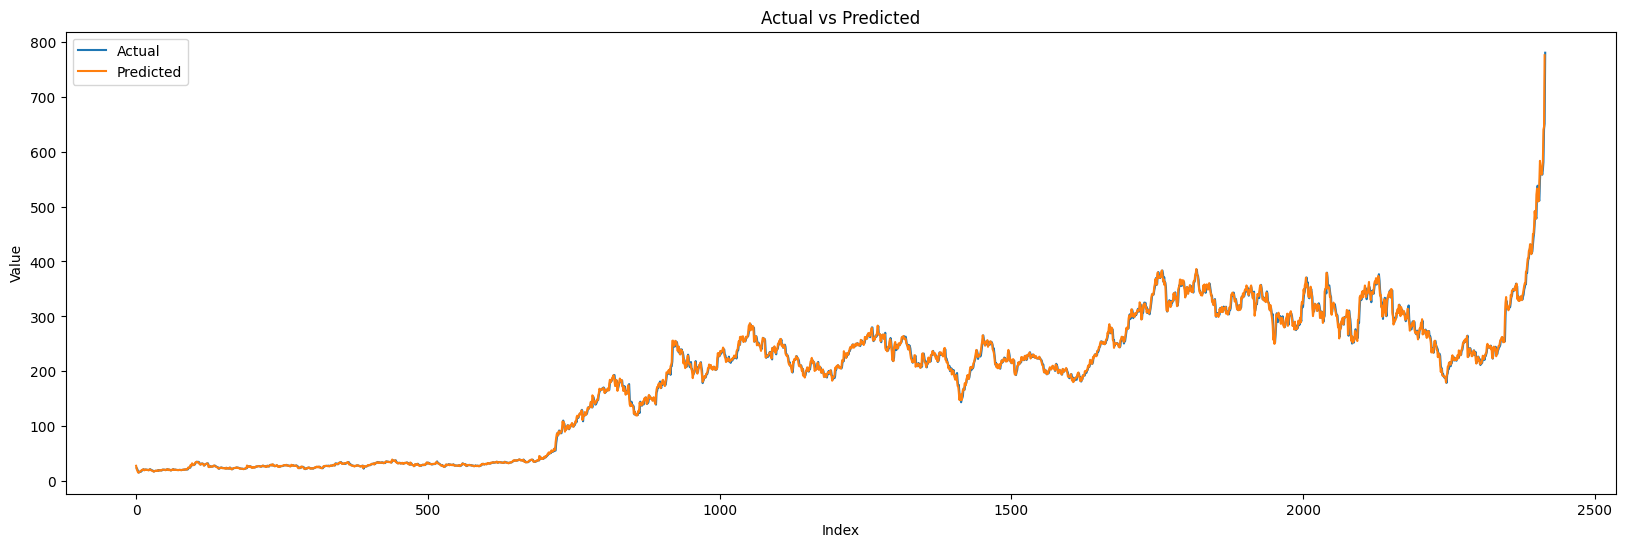

In [22]:
plt.figure(figsize=(20, 6))
plt.plot(y,label="Actual",)
plt.plot(predicted,label="Predicted")
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()